In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

In [2]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
# stride is how the convolution movement is done
# paddinf is the extra cells added to input for auxiliary reasons
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.1545
Epoch [1/5], Step [200/600], Loss: 0.0822
Epoch [1/5], Step [300/600], Loss: 0.0901
Epoch [1/5], Step [400/600], Loss: 0.1470
Epoch [1/5], Step [500/600], Loss: 0.0689
Epoch [1/5], Step [600/600], Loss: 0.0151
Epoch [2/5], Step [100/600], Loss: 0.0480
Epoch [2/5], Step [200/600], Loss: 0.0303
Epoch [2/5], Step [300/600], Loss: 0.0140
Epoch [2/5], Step [400/600], Loss: 0.0094
Epoch [2/5], Step [500/600], Loss: 0.0317
Epoch [2/5], Step [600/600], Loss: 0.0417
Epoch [3/5], Step [100/600], Loss: 0.0333
Epoch [3/5], Step [200/600], Loss: 0.0467
Epoch [3/5], Step [300/600], Loss: 0.0143
Epoch [3/5], Step [400/600], Loss: 0.0371
Epoch [3/5], Step [500/600], Loss: 0.0581
Epoch [3/5], Step [600/600], Loss: 0.0599
Epoch [4/5], Step [100/600], Loss: 0.0070
Epoch [4/5], Step [200/600], Loss: 0.0479
Epoch [4/5], Step [300/600], Loss: 0.0176
Epoch [4/5], Step [400/600], Loss: 0.0217
Epoch [4/5], Step [500/600], Loss: 0.0012
Epoch [4/5], Step [600/600], Loss:

In [13]:
# send the first batch of images of the batch to the 
l1_images = model.layer1(images)

In [14]:
l1_images.shape

torch.Size([100, 16, 14, 14])

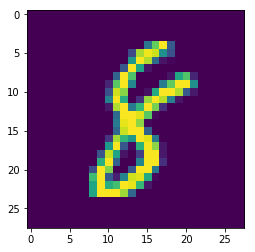

In [32]:
plt.imshow(images[0][0].detach().numpy())

In [11]:
images[0].shape

torch.Size([1, 28, 28])

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


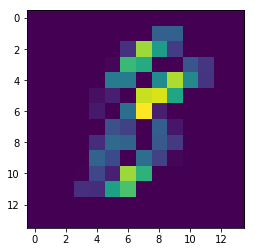

In [38]:
import matplotlib.pyplot as plt
for i in range(16):
    plt.clf
    print(plt.imshow(l1_images[0][i].detach().numpy()))

AxesImage(54,36;334.8x217.44)


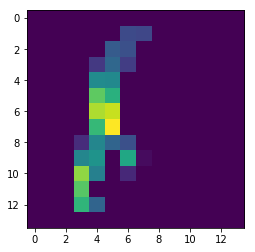

In [39]:
print(plt.imshow(l1_images[0][0].detach().numpy()))

AxesImage(54,36;334.8x217.44)


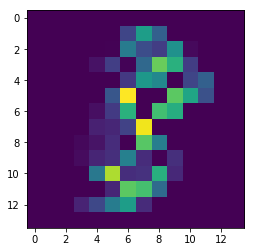

In [40]:
print(plt.imshow(l1_images[0][1].detach().numpy()))

AxesImage(54,36;334.8x217.44)


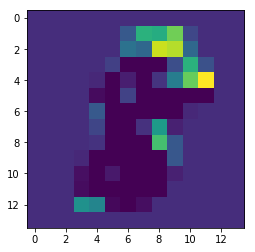

In [41]:
print(plt.imshow(l1_images[0][2].detach().numpy()))

AxesImage(54,36;334.8x217.44)


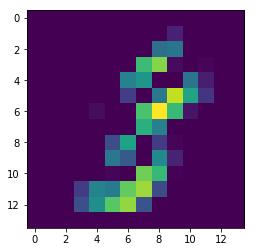

In [42]:
print(plt.imshow(l1_images[0][3].detach().numpy()))

AxesImage(54,36;334.8x217.44)


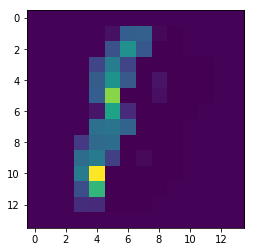

In [43]:
print(plt.imshow(l1_images[0][4].detach().numpy()))

AxesImage(54,36;334.8x217.44)


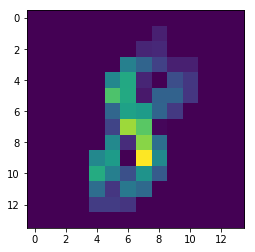

In [44]:
print(plt.imshow(l1_images[0][5].detach().numpy()))

AxesImage(54,36;334.8x217.44)


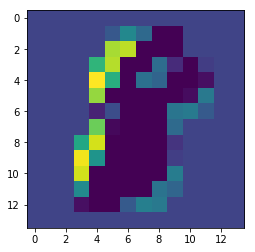

In [45]:
print(plt.imshow(l1_images[0][6].detach().numpy()))

AxesImage(54,36;334.8x217.44)


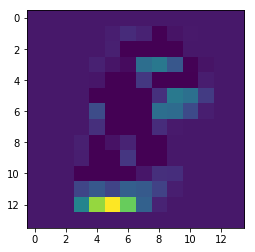

In [46]:
print(plt.imshow(l1_images[0][7].detach().numpy()))

AxesImage(54,36;334.8x217.44)


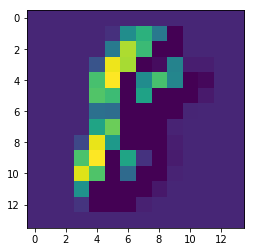

In [47]:
print(plt.imshow(l1_images[0][8].detach().numpy()))

AxesImage(54,36;334.8x217.44)


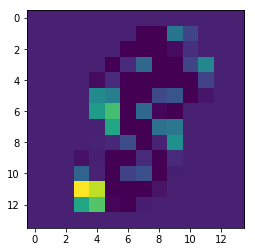

In [48]:
print(plt.imshow(l1_images[0][9].detach().numpy()))